# Step 1: Data Collection

In [ ]:
from tiingo import TiingoClient


config = {
    'api_key': 'f15f38269f3d0b5b4eb89da55ae0890c311047c6'
}

client = TiingoClient(config)

df = client.get_dataframe(
    tickers='TCS',
    startDate='2018-01-01',  
    endDate='2023-01-01',   
    frequency='daily'
)

print(df.head())


                           close  high   low  open  volume   adjClose  \
date                                                                    
2018-01-02 00:00:00+00:00   5.08  5.09  4.72  4.79  313031  71.692394   
2018-01-03 00:00:00+00:00   4.85  5.08  4.83  5.04  243688  68.446479   
2018-01-04 00:00:00+00:00   4.96  4.99  4.75  4.85  247827  69.998873   
2018-01-05 00:00:00+00:00   4.85  4.94  4.77  4.94  205471  68.446479   
2018-01-08 00:00:00+00:00   4.88  4.94  4.65  4.84  158218  68.869859   

                             adjHigh     adjLow    adjOpen  adjVolume  \
date                                                                    
2018-01-02 00:00:00+00:00  71.833521  66.611831  67.599718      20868   
2018-01-03 00:00:00+00:00  71.692394  68.164225  71.127887      16245   
2018-01-04 00:00:00+00:00  70.422254  67.035211  68.446479      16521   
2018-01-05 00:00:00+00:00  69.716620  67.317465  69.716620      13698   
2018-01-08 00:00:00+00:00  69.716620  65.623944  6

In [54]:
import pandas as pd
import numpy as np

In [55]:
len(df)

1259

In [56]:
df.tail()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2022-12-23 00:00:00+00:00,4.26,4.3200,4.1514,4.18,225019,63.90,64.8000,62.2710,62.70,15001,0.0,1.0
2022-12-27 00:00:00+00:00,4.21,4.2625,4.1350,4.23,319193,63.15,63.9375,62.0250,63.45,21279,0.0,1.0
2022-12-28 00:00:00+00:00,4.15,4.3000,4.1300,4.17,239526,62.25,64.5000,61.9500,62.55,15968,0.0,1.0
2022-12-29 00:00:00+00:00,4.30,4.3500,4.1115,4.15,249385,64.50,65.2500,61.6725,62.25,16625,0.0,1.0
2022-12-30 00:00:00+00:00,4.31,4.4000,4.2000,4.21,447692,64.65,66.0000,63.0000,63.15,29846,0.0,1.0


In [57]:
df=df.reset_index()['close']
df

0       5.08
1       4.85
2       4.96
3       4.85
4       4.88
        ... 
1254    4.26
1255    4.21
1256    4.15
1257    4.30
1258    4.31
Name: close, Length: 1259, dtype: float64

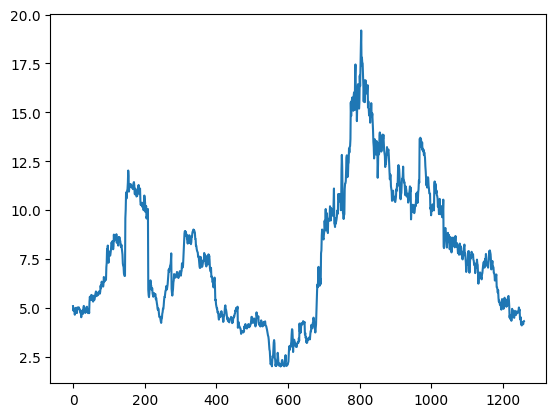

In [58]:
import matplotlib.pyplot as plt
plt.plot(df)

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [60]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [61]:
print(len(train_data))
print(len(test_data))

818
441


In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [63]:
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [64]:
X_test, Y_test = create_dataset(test_data, time_step)

In [65]:
print(X_test[:10])

[[0.83081395 0.83255814 0.8122093  0.83313953 0.8372093  0.77093023
  0.78895349 0.77034884 0.74709302 0.76627907 0.75872093 0.7255814
  0.75872093 0.75813953 0.78372093 0.7505814  0.74302326 0.75290698
  0.73081395 0.70348837 0.66802326 0.65348837 0.61918605 0.65348837
  0.67616279 0.65174419 0.66860465 0.63081395 0.64069767 0.67093023
  0.65523256 0.64593023 0.56162791 0.6005814  0.66453488 0.63081395
  0.63430233 0.68604651 0.69651163 0.67267442 0.65290698 0.66686047
  0.63953488 0.64302326 0.66918605 0.69011628 0.6877907  0.67674419
  0.68953488 0.66860465 0.64302326 0.63546512 0.62674419 0.59360465
  0.60581395 0.60348837 0.61686047 0.63139535 0.65290698 0.63139535
  0.63953488 0.64244186 0.64593023 0.62906977 0.6005814  0.57848837
  0.55697674 0.57151163 0.56976744 0.53604651 0.52906977 0.52093023
  0.49302326 0.49476744 0.52093023 0.52325581 0.50406977 0.50581395
  0.50174419 0.49476744 0.49127907 0.48953488 0.49593023 0.50523256
  0.52732558 0.52267442 0.54302326 0.53604651 0.5

In [66]:
print(Y_train.shape)

(717,)


# Step 2: LSTM 

In [67]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam 

In [68]:
import lightning as L
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
class LightningLSTM(L.LightningModule):

    def __init__(self): 
        
        super().__init__() 
    
        self.lstm = nn.LSTM(input_size=1, hidden_size=1) 
        

    def forward(self, input):
        ## transpose the input vector
        input_trans = input.view(len(input), 1)
        
        lstm_out, temp = self.lstm(input_trans)
        
        prediction = lstm_out[-1] 
        return prediction
        
        
    def configure_optimizers(self):
        return Adam(self.parameters(), lr=0.0001) 

    
    def training_step(self, batch, batch_idx): 
        input_i, label_i = batch 
        output_i = self.forward(input_i[0]) 
        loss = (output_i - label_i)**2 
        
        self.log("train_loss", loss)
        
        self.log("output", output_i)
        
        return loss

# Step 3: Model Training 

In [ ]:
inputs = torch.tensor(X_train.tolist())
labels = torch.tensor(Y_train.tolist())

dataset = TensorDataset(inputs, labels) 
dataloader = DataLoader(dataset)

In [71]:
model = LightningLSTM()

trainer = L.Trainer(max_epochs=200, log_every_n_steps=2)
trainer.fit(model, train_dataloaders=dataloader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name | Type | Params | Mode 
--------------------------------------
0 | lstm | LSTM | 16     | train
--------------------------------------
16        Trainable params
0         Non-trainable params
16        Total params
0.000     Total estimated model params size (MB)
1         Modules in train mode
0         Modules in eval mode
C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Epoch 199: 100%|██████████| 717/717 [00:03<00:00, 205.40it/s, v_num=1]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 199: 100%|██████████| 717/717 [00:03<00:00, 204.49it/s, v_num=1]


In [72]:
def prediction(input):
    predicted_values = []
    for i in range(len(input)):
        x = model.forward(torch.tensor(input[i]).detach())
        predicted_values.append((x.detach()).item())
    return predicted_values

In [73]:
def mean_square_error(predicted_values, actual_values):
    
    Len = len(actual_values)
    mse = 0
    for i in range(Len):
        mse += (actual_values[i] - predicted_values[i])**2
    mse/=Len       
    return mse

In [74]:
predicted_values = prediction(X_test.tolist())

In [75]:
print(len(Y_test))

340


In [76]:
print(mean_square_error(predicted_values, Y_test))

0.0007195378009081114


In [77]:
predicted_values=scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1))
Y_test=scaler.inverse_transform(np.array(Y_test).reshape(-1, 1))

# Plot of Predicted values and Actual values

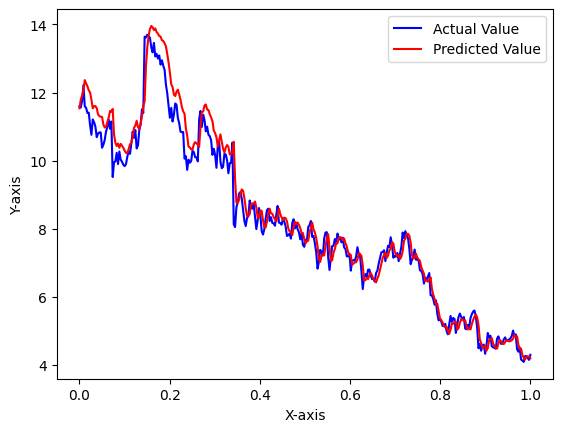

In [78]:
x = np.linspace(0, 1, 340)

# Plot the first set of data in blue
plt.plot(x, Y_test, label='Actual Value', color='blue')

# Plot the second set of data in red
plt.plot(x, predicted_values, label='Predicted Value', color='red')

# Add labels and a legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Display the plot
plt.show()